In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.insert(0, '../scripts/')

Import packages

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from pathlib import Path
%matplotlib inline

Initalize configs

In [85]:
pwd = Path().cwd()
root_dir = pwd.parent
data_dir = root_dir / "data"
file_path = data_dir / "aggregated_data.csv"

# sets global styling for graphs
plt.style.use('seaborn')

# to convert the scientific notation to decimal format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# reset the decimal format back to scientific notation
# pd.reset_option('display.float_format')

In [86]:
data = pd.read_csv(file_path, dtype={"MSISDN/Number": str})

In [87]:
volume_per_user = data.copy()

### Top 10 Customer Engagement By Session
---

In [88]:
top_10_customers_per_session_engagement = volume_per_user.sort_values(by=["Session Count"], ascending=False)[:10]
top_10_customers_per_session_engagement

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
13526,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00
13180,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00
6437,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00
37052,33659725664.0,16,4035428.00,7705862783.00,116516345.00,399519079.00,257991088.00,6725559211.00,35999792.00,35412358.00,6317415487.00
76363,33675877202.0,15,4865947.00,7891110608.00,109860502.00,309093159.00,317410572.00,6970567597.00,31514421.00,19222921.00,6798515150.00
92923,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00
65118,33667163239.0,13,8744914.00,5618394054.00,105032696.00,313939488.00,315231310.00,4725621924.00,30335796.00,24247850.00,4941518794.00
92577,33760413819.0,12,5321667.00,7132370514.00,82738720.00,318347546.00,303169107.00,6268619592.00,25576965.00,20777205.00,4101645436.00
1279,33604515716.0,12,5207990.00,5487855293.00,83815037.00,265374262.00,179686748.00,4846663427.00,23854429.00,18476523.00,4129942723.00
666,33603127838.0,12,6287761.00,4976195043.00,86929016.00,260488421.00,284090139.00,4191444592.00,26198895.00,23077825.00,6326670874.00


In [89]:
top_10_customers_per_session_engagement[["MSISDN/Number", "Session Count", "Dur. (s)", "Total Data Transferred"]]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred
13526,33626320676.0,18,8791927.00,7971167261.00
13180,33625779332.0,17,18553754.00,8499620722.00
6437,33614892860.0,17,9966898.00,8846226494.00
37052,33659725664.0,16,4035428.00,7705862783.00
76363,33675877202.0,15,4865947.00,7891110608.00
92923,33760536639.0,15,9279434.00,8514773963.00
65118,33667163239.0,13,8744914.00,5618394054.00
92577,33760413819.0,12,5321667.00,7132370514.00
1279,33604515716.0,12,5207990.00,5487855293.00
666,33603127838.0,12,6287761.00,4976195043.00


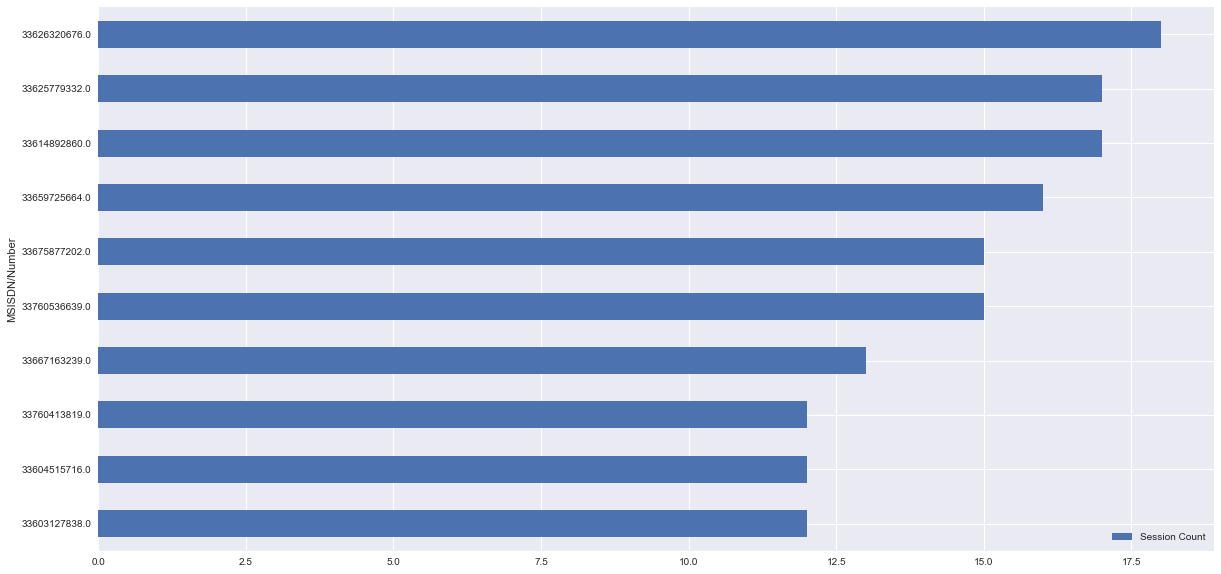

In [90]:
top_10_customers_per_session_engagement.plot(kind="barh", x="MSISDN/Number", y="Session Count", figsize=(20, 10)).invert_yaxis()

### Top 10 Customer Engagement By Duration
---

In [91]:
top_10_customers_per_duration_engagement = volume_per_user.sort_values(by=["Dur. (s)"], ascending=False)[:10]
top_10_customers_per_duration_engagement

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
13180,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00
6437,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00
92923,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00
13526,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00
65118,33667163239.0,13,8744914.00,5618394054.00,105032696.00,313939488.00,315231310.00,4725621924.00,30335796.00,24247850.00,4941518794.00
50281,33662840755.0,9,6614270.00,4000097981.00,63963503.00,184267814.00,262998846.00,3351103082.00,17891599.00,17463934.00,3995786399.00
57160,33664693736.0,9,6288730.00,5682007334.00,73583110.00,261564558.00,205367769.00,5008820336.00,17579618.00,17185041.00,4960857897.00
666,33603127838.0,12,6287761.00,4976195043.00,86929016.00,260488421.00,284090139.00,4191444592.00,26198895.00,23077825.00,6326670874.00
66029,33667456716.0,6,5649882.00,2600521941.00,39433670.00,174043458.00,145638923.00,2158159088.00,20038064.00,7784073.00,2832420743.00
92577,33760413819.0,12,5321667.00,7132370514.00,82738720.00,318347546.00,303169107.00,6268619592.00,25576965.00,20777205.00,4101645436.00


In [92]:
top_10_customers_per_duration_engagement[["MSISDN/Number", "Session Count", "Dur. (s)", "Total Data Transferred"]]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred
13180,33625779332.0,17,18553754.00,8499620722.00
6437,33614892860.0,17,9966898.00,8846226494.00
92923,33760536639.0,15,9279434.00,8514773963.00
13526,33626320676.0,18,8791927.00,7971167261.00
65118,33667163239.0,13,8744914.00,5618394054.00
50281,33662840755.0,9,6614270.00,4000097981.00
57160,33664693736.0,9,6288730.00,5682007334.00
666,33603127838.0,12,6287761.00,4976195043.00
66029,33667456716.0,6,5649882.00,2600521941.00
92577,33760413819.0,12,5321667.00,7132370514.00


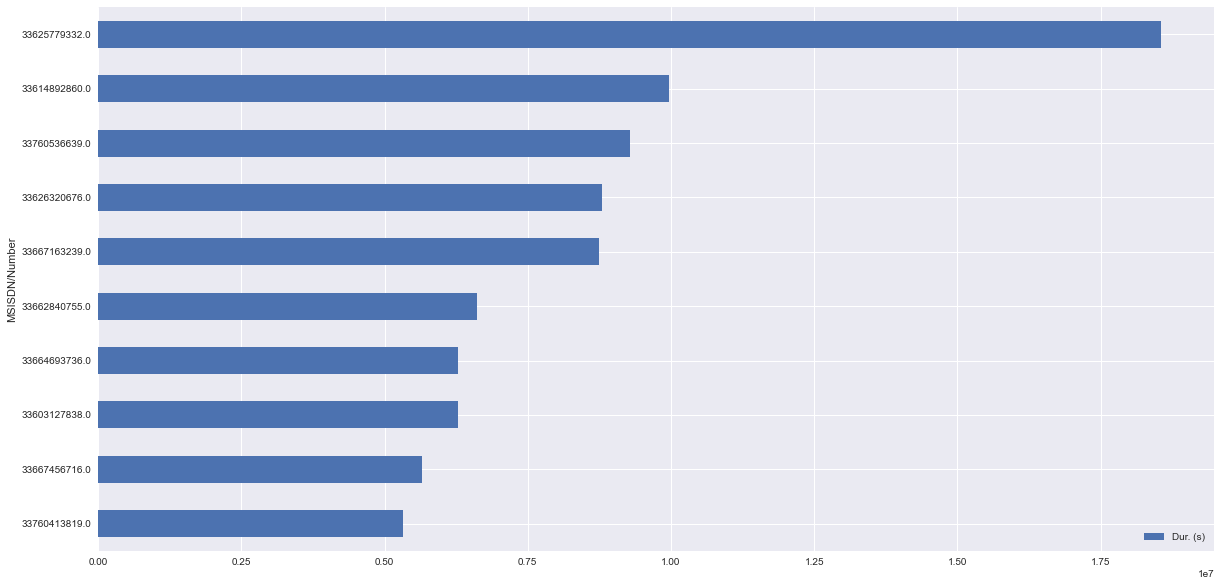

In [93]:
top_10_customers_per_duration_engagement.plot(kind="barh", x="MSISDN/Number", y="Dur. (s)", figsize=(20, 10)).invert_yaxis()

### Top 10 Customer Engagement By Total Data Transferred
---

In [94]:
top_10_customers_per_data_engagement = volume_per_user.sort_values(by=["Total Data Transferred"], ascending=False)[:10]
top_10_customers_per_data_engagement

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
6437,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00
92923,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00
13180,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00
13526,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00
76363,33675877202.0,15,4865947.00,7891110608.00,109860502.00,309093159.00,317410572.00,6970567597.00,31514421.00,19222921.00,6798515150.00
37052,33659725664.0,16,4035428.00,7705862783.00,116516345.00,399519079.00,257991088.00,6725559211.00,35999792.00,35412358.00,6317415487.00
63028,33666464084.0,11,4536757.00,7308500938.00,89320737.00,214416926.00,227336012.00,6646303338.00,25557139.00,18629986.00,4349141478.00
92577,33760413819.0,12,5321667.00,7132370514.00,82738720.00,318347546.00,303169107.00,6268619592.00,25576965.00,20777205.00,4101645436.00
57241,33664712899.0,11,2927785.00,6872018208.00,90389372.00,251798809.00,276834013.00,6103856008.00,21426007.00,19390599.00,3976960308.00
86455,33698792269.0,11,5169128.00,6540899126.00,79736125.00,268247480.00,302661958.00,5753743069.00,29059042.00,15728161.00,4689876286.00


In [95]:
top_10_customers_per_data_engagement[["MSISDN/Number", "Session Count", "Dur. (s)", "Total Data Transferred"]]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred
6437,33614892860.0,17,9966898.00,8846226494.00
92923,33760536639.0,15,9279434.00,8514773963.00
13180,33625779332.0,17,18553754.00,8499620722.00
13526,33626320676.0,18,8791927.00,7971167261.00
76363,33675877202.0,15,4865947.00,7891110608.00
37052,33659725664.0,16,4035428.00,7705862783.00
63028,33666464084.0,11,4536757.00,7308500938.00
92577,33760413819.0,12,5321667.00,7132370514.00
57241,33664712899.0,11,2927785.00,6872018208.00
86455,33698792269.0,11,5169128.00,6540899126.00


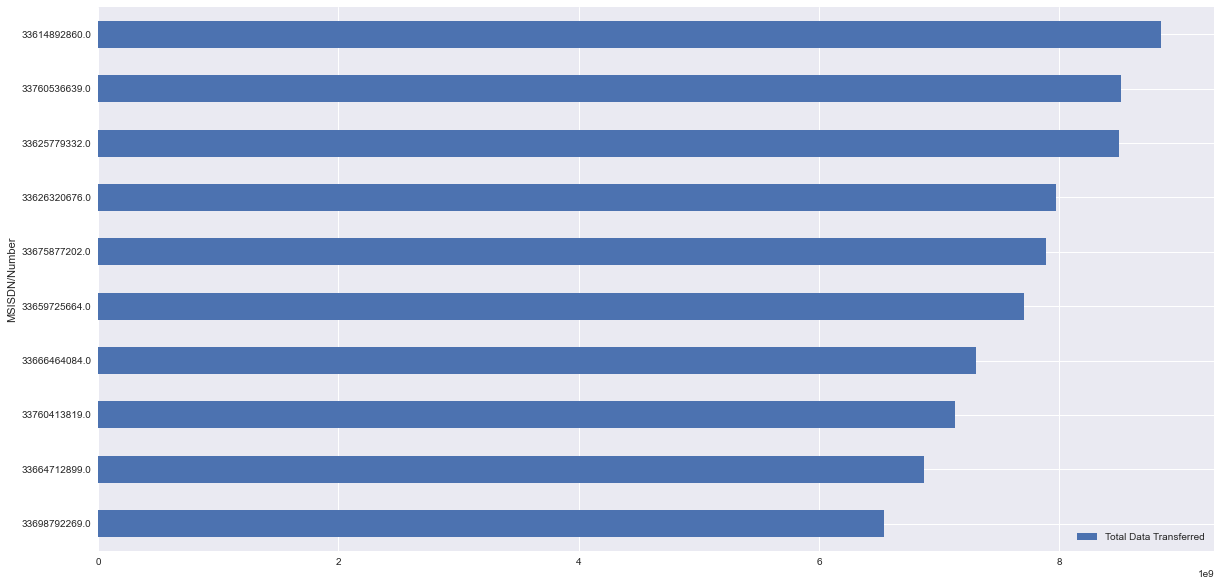

In [96]:
top_10_customers_per_data_engagement.plot(kind="barh", x="MSISDN/Number", y="Total Data Transferred", figsize=(20, 10)).invert_yaxis()

### K-means
---

In [97]:
scaler = MinMaxScaler()

In [98]:
df_norm = pd.DataFrame(scaler.fit_transform(volume_per_user.select_dtypes(include=np.number)), columns=volume_per_user.select_dtypes(include=np.number).columns)

In [99]:
df_norm.head()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes)
0,0.06,0.01,0.10,0.03,0.07,0.05,0.10,0.03,0.05,0.05
1,0.06,0.01,0.01,0.03,0.03,0.03,0.02,0.08,0.06,0.03
2,0.06,0.01,0.06,0.02,0.05,0.05,0.07,0.08,0.07,0.06
3,0.06,0.00,0.04,0.06,0.00,0.02,0.05,0.05,0.01,0.00
4,0.11,0.00,0.16,0.12,0.12,0.09,0.17,0.08,0.07,0.10


In [100]:
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(df_norm.select_dtypes(include=np.number))
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
volume_per_user_orig = volume_per_user.copy()

In [104]:
volume_per_user["Cluster"] = kmeans.labels_

In [105]:
volume_per_user

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
0,33601001722.0,1,116720.00,878690574.00,4389005.00,27180981.00,21624548.00,812458661.00,1331362.00,2232135.00,386570872.00,0
1,33601001754.0,1,181230.00,156859643.00,5334863.00,11221763.00,12432223.00,119750078.00,3307781.00,2660565.00,281710071.00,0
2,33601002511.0,1,134969.00,595966483.00,3443126.00,19353900.00,21333570.00,538827713.00,3205380.00,3195623.00,501693672.00,0
3,33601007832.0,1,49878.00,422320698.00,9678493.00,1942092.00,6977321.00,391126127.00,2284670.00,280294.00,35279702.00,0
4,33601008617.0,2,37104.00,1457410944.00,18499616.00,49201724.00,41533002.00,1314797820.00,3305469.00,2912542.00,804804484.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
106851,33789996170.0,1,8810.00,714641641.00,7531269.00,14902538.00,26647843.00,660361359.00,1006915.00,300183.00,295282817.00,0
106852,33789997247.0,1,140988.00,480307335.00,5429705.00,8531060.00,19851572.00,437003292.00,2514097.00,498569.00,211115113.00,0
106853,3197020876596.0,1,877385.00,232123971.00,10438660.00,26592300.00,11959905.00,178048738.00,1520771.00,715224.00,470526473.00,0
106854,337000037000919.0,1,253030.00,596287824.00,9830617.00,30905042.00,36734940.00,510142695.00,3318582.00,521566.00,149188439.00,0


<AxesSubplot:xlabel='Google Volume (Bytes)', ylabel='Total Data Transferred'>

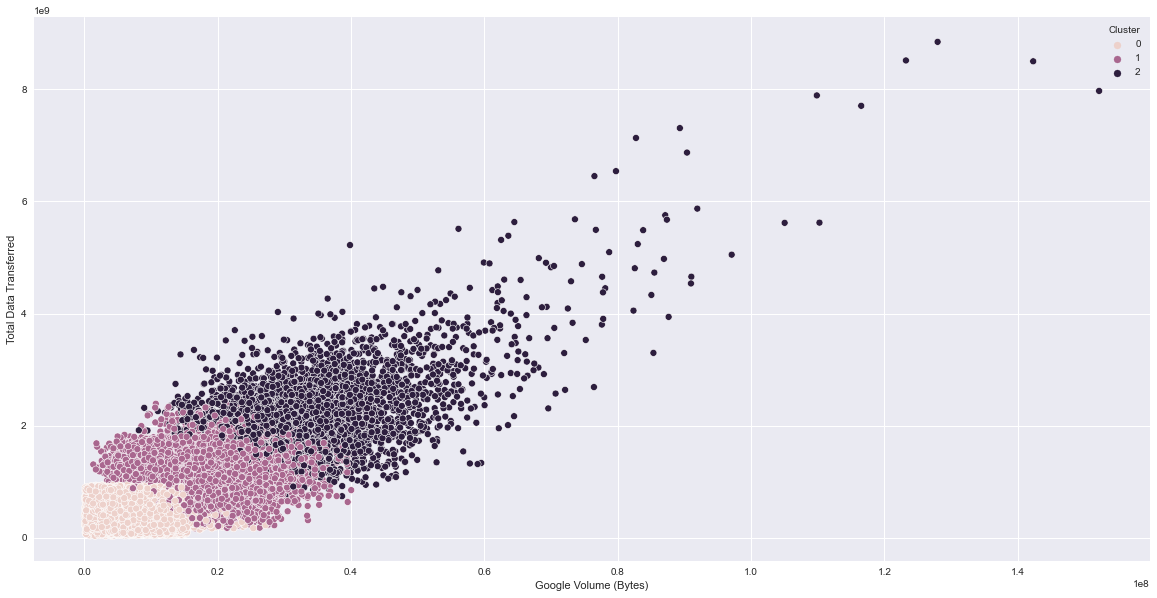

In [106]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="Google Volume (Bytes)", y="Total Data Transferred",hue = 'Cluster',  data=volume_per_user, ax=ax)

In [107]:
volume_per_user.loc[volume_per_user["Cluster"] == 0].describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
count,78856.00,78856.00,78856.00,78856.00,78856.00,78856.00,78856.00,78856.00,78856.00,78856.00,78856.00
mean,1.01,104668.50,496805521.39,7881145.64,22806501.86,22878301.63,430724874.99,2281206.59,1843630.50,432212291.02,0.00
std,0.14,75986.02,243493001.82,3593947.47,9461693.53,9484317.77,243314540.04,1091068.08,1050228.57,245246426.15,0.00
min,0.00,7142.00,33249009.00,40330.00,184569.00,78903.00,306358.00,18176.00,1563.00,149045.00,0.00
25%,1.00,54466.25,287681554.75,4977543.00,16044111.75,16099702.50,220882400.25,1367226.25,938225.50,220377619.75,0.00
50%,1.00,86400.00,497940508.50,7861295.00,22737547.50,22827189.50,431844113.00,2286803.50,1834704.50,431610987.50,0.00
75%,1.00,139310.50,706246054.75,10747332.00,29435490.25,29565338.00,641042734.75,3177386.00,2746739.50,642973916.50,0.00
max,2.00,1573420.00,1249264521.00,27307801.00,73657380.00,77586501.00,1156491276.00,8142171.00,7113142.00,1550645452.00,0.00


In [108]:
volume_per_user.loc[volume_per_user["Cluster"] == 1].describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
count,23883.00,23883.00,23883.00,23883.00,23883.00,23883.00,23883.00,23883.00,23883.00,23883.00,23883.00
mean,2.15,210223.90,1069028515.92,16809931.46,48891139.77,48703488.82,928061612.46,4854946.07,3950424.46,927310604.37,1.00
std,0.37,141959.73,359730252.43,5677434.02,15432612.75,15435413.26,354127858.97,1715946.23,1606388.47,378578113.29,0.00
min,0.00,14161.00,149921600.00,1346703.00,3539613.00,3590164.00,27442564.00,200967.00,61882.00,21747166.00,1.00
25%,2.00,114703.00,811808883.00,12873017.50,38338019.50,38024580.00,675961626.50,3660685.50,2814205.00,656446173.50,1.00
50%,2.00,179344.00,1056304188.00,16534544.00,48164449.00,47779250.00,918977323.00,4764376.00,3890822.00,915042414.00,1.00
75%,2.00,264574.50,1321045809.50,20490288.50,58343024.00,58253575.50,1177591204.50,5980246.50,5053214.00,1189178003.00,1.00
max,4.00,3174824.00,2484730593.00,40679661.00,117461184.00,135798689.00,2314767120.00,12867609.00,10828226.00,2419876117.00,1.00


In [109]:
volume_per_user.loc[volume_per_user["Cluster"] == 2].describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
count,4117.00,4117.00,4117.00,4117.00,4117.00,4117.00,4117.00,4117.00,4117.00,4117.00,4117.00
mean,4.27,569424.52,2216600017.23,33982559.71,98120824.78,98355000.36,1933150637.90,9868890.36,7902897.17,1876308217.31,2.00
std,1.21,661868.79,702618687.09,11539083.86,32052595.56,32478517.52,651332265.92,3442289.98,2968237.37,676581586.31,0.00
min,3.00,46896.00,744422065.00,8173290.00,27966688.00,30714865.00,455881755.00,2077731.00,1008465.00,294154547.00,2.00
25%,4.00,338429.00,1782698454.00,26432616.00,78063049.00,77295343.00,1528908704.00,7663278.00,5963630.00,1433270064.00,2.00
50%,4.00,421154.00,2106842291.00,32567009.00,93946447.00,93353367.00,1851146156.00,9461192.00,7573909.00,1806281468.00,2.00
75%,5.00,534820.00,2533273215.00,39426989.00,112477130.00,113996522.00,2241776068.00,11454185.00,9483574.00,2226551200.00,2.00
max,18.00,18553754.00,8846226494.00,152191852.00,399519079.00,452958769.00,7749432234.00,42418782.00,43374779.00,8167877776.00,2.00


In [110]:
volume_per_user.sample(5)

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
30294,33658275640.0,2,172799.00,661914549.00,21450189.00,32202139.00,28305873.00,556272827.00,4997883.00,5602440.00,1044091496.00,1
56932,33664636582.0,2,172799.00,1336036168.00,16361083.00,44802606.00,58211325.00,1200361875.00,4428422.00,3613078.00,1186609876.00,1
105103,33782969591.0,2,127556.00,1523953641.00,22598732.00,50807353.00,48352456.00,1379199884.00,4842974.00,5879063.00,978035881.00,1
52170,33663321258.0,1,86400.00,240034095.00,9090980.00,22408042.00,41748480.00,154693511.00,2909283.00,3198834.00,796413376.00,0
39559,33660317288.0,1,31252.00,821614929.00,13657095.00,19068356.00,38542967.00,745098769.00,1066838.00,2288100.00,114682988.00,0


In [111]:
volume_per_user.sort_values(by="Google Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
13526,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00,2
13180,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00,2
6437,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00,2
92923,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00,2
37052,33659725664.0,16,4035428.00,7705862783.00,116516345.00,399519079.00,257991088.00,6725559211.00,35999792.00,35412358.00,6317415487.00,2
106137,33786323068.0,12,4059652.00,5622231529.00,110254484.00,305939790.00,214763912.00,4851095633.00,36310123.00,23974919.00,4252487035.00,2
76363,33675877202.0,15,4865947.00,7891110608.00,109860502.00,309093159.00,317410572.00,6970567597.00,31514421.00,19222921.00,6798515150.00,2
65118,33667163239.0,13,8744914.00,5618394054.00,105032696.00,313939488.00,315231310.00,4725621924.00,30335796.00,24247850.00,4941518794.00,2
94654,33761268199.0,10,3481629.00,5051114473.00,97089988.00,292091341.00,272789592.00,4274098999.00,20753721.00,14496080.00,5077779438.00,2
86313,33698756430.0,10,2061185.00,5872262506.00,91935151.00,280812448.00,251422091.00,5118380458.00,28439707.00,15496248.00,4532623724.00,2


In [112]:
volume_per_user.sort_values(by="Netflix Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
37052,33659725664.0,16,4035428.00,7705862783.00,116516345.00,399519079.00,257991088.00,6725559211.00,35999792.00,35412358.00,6317415487.00,2
6437,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00,2
13180,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00,2
92923,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00,2
13526,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00,2
92577,33760413819.0,12,5321667.00,7132370514.00,82738720.00,318347546.00,303169107.00,6268619592.00,25576965.00,20777205.00,4101645436.00,2
65118,33667163239.0,13,8744914.00,5618394054.00,105032696.00,313939488.00,315231310.00,4725621924.00,30335796.00,24247850.00,4941518794.00,2
76363,33675877202.0,15,4865947.00,7891110608.00,109860502.00,309093159.00,317410572.00,6970567597.00,31514421.00,19222921.00,6798515150.00,2
106137,33786323068.0,12,4059652.00,5622231529.00,110254484.00,305939790.00,214763912.00,4851095633.00,36310123.00,23974919.00,4252487035.00,2
94654,33761268199.0,10,3481629.00,5051114473.00,97089988.00,292091341.00,272789592.00,4274098999.00,20753721.00,14496080.00,5077779438.00,2


In [113]:
volume_per_user.sort_values(by="Youtube Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
13180,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00,2
92923,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00,2
6437,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00,2
13526,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00,2
76363,33675877202.0,15,4865947.00,7891110608.00,109860502.00,309093159.00,317410572.00,6970567597.00,31514421.00,19222921.00,6798515150.00,2
65118,33667163239.0,13,8744914.00,5618394054.00,105032696.00,313939488.00,315231310.00,4725621924.00,30335796.00,24247850.00,4941518794.00,2
13994,33627080969.0,12,4703516.00,5754730859.00,87125921.00,267040897.00,308790774.00,4972352941.00,23567219.00,17808911.00,5117790890.00,2
92577,33760413819.0,12,5321667.00,7132370514.00,82738720.00,318347546.00,303169107.00,6268619592.00,25576965.00,20777205.00,4101645436.00,2
86455,33698792269.0,11,5169128.00,6540899126.00,79736125.00,268247480.00,302661958.00,5753743069.00,29059042.00,15728161.00,4689876286.00,2
666,33603127838.0,12,6287761.00,4976195043.00,86929016.00,260488421.00,284090139.00,4191444592.00,26198895.00,23077825.00,6326670874.00,2


In [114]:
volume_per_user.sort_values(by="Gaming Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
6437,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00,2
92923,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00,2
13180,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00,2
76363,33675877202.0,15,4865947.00,7891110608.00,109860502.00,309093159.00,317410572.00,6970567597.00,31514421.00,19222921.00,6798515150.00,2
13526,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00,2
37052,33659725664.0,16,4035428.00,7705862783.00,116516345.00,399519079.00,257991088.00,6725559211.00,35999792.00,35412358.00,6317415487.00,2
63028,33666464084.0,11,4536757.00,7308500938.00,89320737.00,214416926.00,227336012.00,6646303338.00,25557139.00,18629986.00,4349141478.00,2
92577,33760413819.0,12,5321667.00,7132370514.00,82738720.00,318347546.00,303169107.00,6268619592.00,25576965.00,20777205.00,4101645436.00,2
57241,33664712899.0,11,2927785.00,6872018208.00,90389372.00,251798809.00,276834013.00,6103856008.00,21426007.00,19390599.00,3976960308.00,2
86455,33698792269.0,11,5169128.00,6540899126.00,79736125.00,268247480.00,302661958.00,5753743069.00,29059042.00,15728161.00,4689876286.00,2


In [115]:
volume_per_user.sort_values(by="Email Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
13526,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00,2
6437,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00,2
13180,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00,2
106137,33786323068.0,12,4059652.00,5622231529.00,110254484.00,305939790.00,214763912.00,4851095633.00,36310123.00,23974919.00,4252487035.00,2
37052,33659725664.0,16,4035428.00,7705862783.00,116516345.00,399519079.00,257991088.00,6725559211.00,35999792.00,35412358.00,6317415487.00,2
92923,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00,2
76363,33675877202.0,15,4865947.00,7891110608.00,109860502.00,309093159.00,317410572.00,6970567597.00,31514421.00,19222921.00,6798515150.00,2
60087,33665460546.0,9,2566292.00,5388630694.00,63597426.00,197517914.00,232292532.00,4781002506.00,30417885.00,10554843.00,2973452159.00,2
65118,33667163239.0,13,8744914.00,5618394054.00,105032696.00,313939488.00,315231310.00,4725621924.00,30335796.00,24247850.00,4941518794.00,2
86455,33698792269.0,11,5169128.00,6540899126.00,79736125.00,268247480.00,302661958.00,5753743069.00,29059042.00,15728161.00,4689876286.00,2


In [116]:
volume_per_user.sort_values(by="Social Media Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
13526,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00,2
92923,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00,2
37052,33659725664.0,16,4035428.00,7705862783.00,116516345.00,399519079.00,257991088.00,6725559211.00,35999792.00,35412358.00,6317415487.00,2
6437,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00,2
13180,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00,2
65118,33667163239.0,13,8744914.00,5618394054.00,105032696.00,313939488.00,315231310.00,4725621924.00,30335796.00,24247850.00,4941518794.00,2
106137,33786323068.0,12,4059652.00,5622231529.00,110254484.00,305939790.00,214763912.00,4851095633.00,36310123.00,23974919.00,4252487035.00,2
70960,33669068942.0,11,610801.00,3906542286.00,77824684.00,212009030.00,236402804.00,3269151651.00,22923413.00,23800834.00,4605369289.00,2
666,33603127838.0,12,6287761.00,4976195043.00,86929016.00,260488421.00,284090139.00,4191444592.00,26198895.00,23077825.00,6326670874.00,2
31331,33658490784.0,9,3061779.00,2690138875.00,76434143.00,186793931.00,183264219.00,2125069243.00,19677691.00,23000066.00,4315511033.00,2


In [117]:
volume_per_user.sort_values(by="Other Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Cluster
13526,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00,2
6437,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00,2
76363,33675877202.0,15,4865947.00,7891110608.00,109860502.00,309093159.00,317410572.00,6970567597.00,31514421.00,19222921.00,6798515150.00,2
13180,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00,2
666,33603127838.0,12,6287761.00,4976195043.00,86929016.00,260488421.00,284090139.00,4191444592.00,26198895.00,23077825.00,6326670874.00,2
37052,33659725664.0,16,4035428.00,7705862783.00,116516345.00,399519079.00,257991088.00,6725559211.00,35999792.00,35412358.00,6317415487.00,2
13936,33626948251.0,10,2415036.00,4825638441.00,69987947.00,262722069.00,200085240.00,4181762590.00,17482788.00,16922002.00,5305447882.00,2
13994,33627080969.0,12,4703516.00,5754730859.00,87125921.00,267040897.00,308790774.00,4972352941.00,23567219.00,17808911.00,5117790890.00,2
94654,33761268199.0,10,3481629.00,5051114473.00,97089988.00,292091341.00,272789592.00,4274098999.00,20753721.00,14496080.00,5077779438.00,2
30715,33658361927.0,10,2131710.00,6452397856.00,76507138.00,264142078.00,260989846.00,5705919641.00,19682048.00,17285759.00,5013650844.00,2


In [118]:
top_3_applications = volume_per_user[["Google Volume (Bytes)", "Netflix Volume (Bytes)", "Email Volume (Bytes)", "Youtube Volume (Bytes)", "Gaming Volume (Bytes)", "Social Media Volume (Bytes)", "Other Volume (Bytes)"]].sum().nlargest(3)

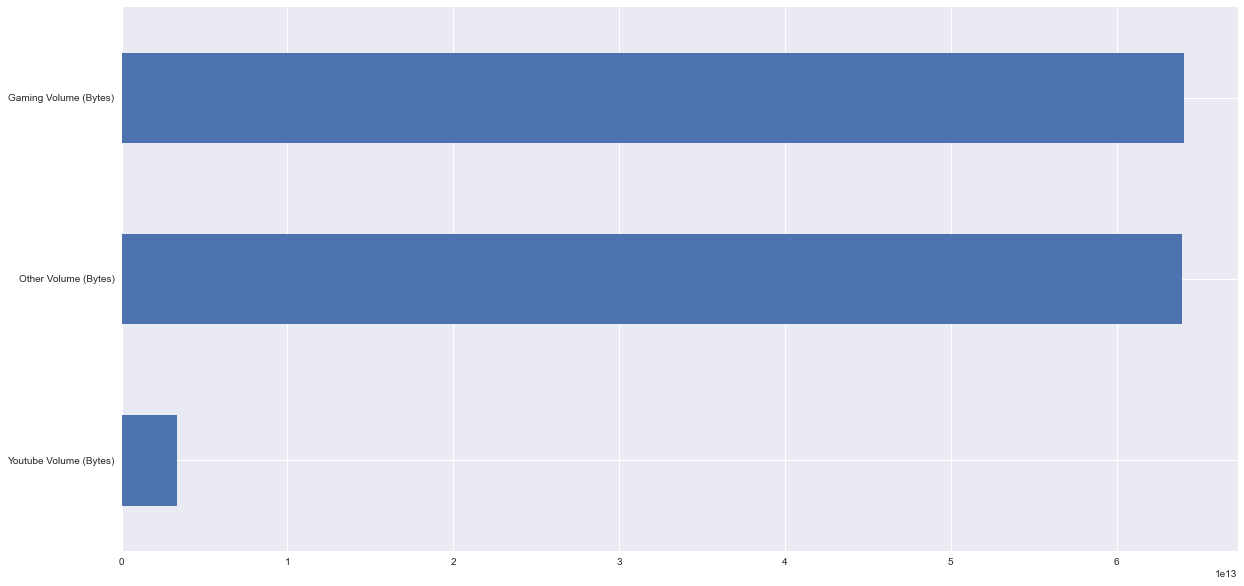

In [119]:
top_3_applications.plot(kind="barh", figsize=(20, 10)).invert_yaxis()

Optimal K using elbow method

In [122]:
distortions = []

for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_norm)
    distortions.append(kmeanModel.inertia_)

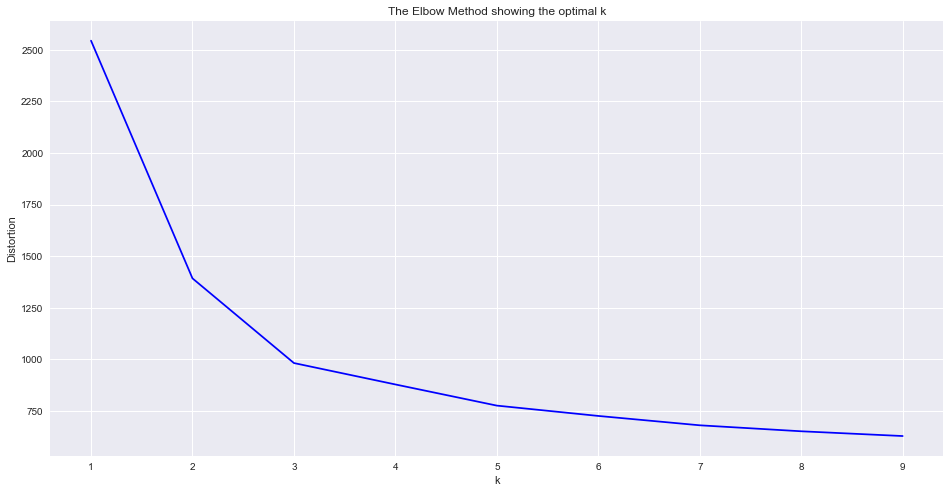

In [123]:
plt.figure(figsize=(16,8))
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can see that the “elbow” is the number 3 which is optimal for this case